In [535]:
#!pip install --upgrade matplotlib
#!pip install --upgrade mpl_toolkits

In [536]:
#!pip install shap
#!pip install category_encoders
#!pip install pdpbox

In [537]:
#!pip install xgboost==1.7.2
#!pip install eli5

In [538]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#import warnings
#warnings.simplefilter(action='ignore')

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import *

#import shap
#from pdpbox.pdp import pdp_isolate, pdp_plot

In [539]:
#from google.colab import files
#files.upload()

In [540]:
lake2 = pd.read_csv("lake2.csv")

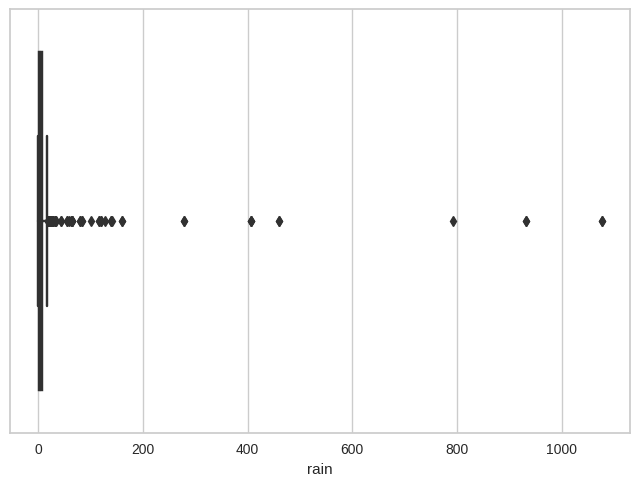

In [541]:
# 전처리
# rain 이상치
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=lake2['rain'])
plt.show()
# 200이상은 이상치, 정확도를 높이기 위해 제거해주기
lake2 = lake2[lake2['rain'] < 200]

In [542]:
lake2.isnull().sum()

No                 0
Lake               0
Year               0
Month              0
Season             0
Elevation          0
rain               0
Input              0
Water_temp         0
cond               0
pH                 0
SS                 0
BOD                0
COD                0
T_N                0
DTN                0
NH4N               0
NO3N               0
T_P                0
DTP                0
PO4P               0
CHL                0
Achnanthes         0
Amphora            0
Asterionella       0
Aulacoseira        0
Cocconeis          0
Cyclotella         0
Cymbella           0
Diatoma            0
Fragilaria         0
Gomphonema         0
Melosira           0
Navicula           0
Nitzschia          0
Skeletonema        0
Stephanodiscus     0
Synedra            0
Actinastrum        0
Ankistrodesmus     0
Carteria           0
Characium          0
Chlamydomonas      0
Coelastrum         0
Dictyosphaerium    0
Elakatothrix       0
Eudorina           0
Hormidium    

In [543]:
# 결측치
lake2 = lake2.dropna()

In [544]:
lake2

,No,Lake,Year,Month,Season,Elevation,rain,Input,Water_temp,cond,pH,SS,BOD,COD,T_N,DTN,NH4N,NO3N,T_P,DTP,PO4P,CHL,Achnanthes,Amphora,Asterionella,Aulacoseira,Cocconeis,Cyclotella,Cymbella,Diatoma,Fragilaria,Gomphonema,Melosira,Navicula,Nitzschia,Skeletonema,Stephanodiscus,Synedra,Actinastrum,Ankistrodesmus,Carteria,Characium,Chlamydomonas,Coelastrum,Dictyosphaerium,Elakatothrix,Eudorina,Hormidium,Micractinium,Asterococcus,Monoraphidum,Oocystis,Pandorina,Pediastrum,Scenedesmus,Ulothrix,Cosmarium,Euastrum,Westella,Dolichospermum,Aphanizomenon,Aphanocapsa,Aphanothece,Merismopedia,Chrococcus,Pseudanabaena,Synechocystis,Oscillatoriale,Microcystis,Euglena,Ceratium,Cryptomonas,Rhodomonas,Dinobryon,Lagynion,Mallomonas,Peridinium
0,1.0,Paldang,2008.0,3.0,Spring,25.0,2.0,284.0,6.2,158.0,8.9,6.6,2.0,4.5,2.11,1.91,0.02,1.72,0.027,0.008,0.003,23.0,5.0,0.0,275.0,83.0,3.0,423.0,98.0,10.0,140.0,10.0,0.0,280.0,575.0,0.0,12023.0,10.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,33.0,0.0,48.0,20.0,193.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,3.0,0.0,110.0,105.0,0.0,0.0,20.0,0.0
1,2.0,Paldang,2008.0,4.0,Spring,25.0,2.0,240.0,11.8,148.0,8.7,6.3,2.0,4.3,2.05,1.86,0.04,1.63,0.043,0.015,0.003,22.8,0.0,6.0,1236.0,8.0,0.0,195.0,35.0,3.0,578.0,0.0,0.0,36.0,605.0,0.0,4609.0,4.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,4.0,0.0,0.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,3.0
2,3.0,Paldang,2008.0,5.0,Spring,25.0,2.0,232.0,16.1,142.0,8.3,5.5,1.5,3.9,1.69,1.55,0.07,1.32,0.045,0.016,0.006,11.6,3.0,5.0,1195.0,4.0,10.0,1061.0,8.0,3.0,461.0,0.0,0.0,0.0,303.0,0.0,2085.0,6.0,0.0,0.0,0.0,0.0,64.0,740.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,106.0,145.0,60.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,343.0,41.0,3.0,0.0,3.0,8.0
3,4.0,Paldang,2008.0,6.0,Summer,25.0,6.0,287.0,20.1,145.0,8.0,6.7,1.5,3.9,1.70,1.55,0.10,1.26,0.055,0.027,0.015,14.7,4.0,0.0,933.0,1889.0,0.0,1608.0,10.0,3.0,55.0,0.0,0.0,34.0,489.0,0.0,341.0,78.0,93.0,0.0,0.0,93.0,75.0,0.0,80.0,0.0,20.0,0.0,290.0,0.0,4.0,18.0,128.0,13.0,260.0,0.0,0.0,0.0,0.0,50.0,40.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,6.0,0.0,0.0,5.0,10.0
4,5.0,Paldang,2008.0,7.0,Summer,25.0,16.0,1352.0,22.6,141.0,7.7,9.3,1.1,4.0,2.03,1.91,0.08,1.59,0.080,0.046,0.030,11.9,10.0,0.0,3.0,1293.0,1.0,1074.0,21.0,0.0,0.0,4.0,8.0,84.0,505.0,0.0,43.0,10.0,118.0,0.0,0.0,20.0,3.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,10.0,0.0,278.0,0.0,300.0,0.0,0.0,0.0,0.0,1478.0,210.0,0.0,0.0,0.0,60.0,105.0,0.0,0.0,257.0,0.0,0.0,111.0,400.0,3.0,0.0,29.0,173.0
5,6.0,Paldang,2008.0,8.0,Summer,25.0,10.0,1347.0,21.9,107.0,7.1,12.0,0.8,3.3,1.93,1.83,0.03,1.64,0.074,0.041,0.031,4.7,3.0,0.0,12.0,208.0,5.0,767.0,15.0,3.0,5.0,0.0,34.0,177.0,727.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,4.0,20.0,50.0,0.0,40.0,0.0,48.0,0.0,10.0,0.0,0.0,0.0,417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.0,0.0,175.0,0.0,0.0,39.0,0.0,0.0,34.0,15.0,14.0,0.0,0.0,5.0
6,7.0,Paldang,2008.0,9.0,Fall,25.0,4.0,361.0,22.5,121.0,8.0,5.7,1.1,3.3,1.72,1.57,0.03,1.32,0.043,0.014,0.004,8.8,13.0,3.0,1.0,2101.0,0.0,1065.0,0.0,3.0,0.0,0.0,10.0,38.0,1693.0,0.0,0.0,53.0,173.0,0.0,0.0,0.0,10.0,0.0,83.0,0.0,40.0,180.0,8.0,0.0,348.0,8.0,130.0,80.0,160.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,795.0,5.0,0.0,0.0,0.0,33.0,0.0,0.0,135.0,71.0,0.0,0.0,8.0,3.0
7,8.0,Paldang,2008.0,10.0,Fall,25.0,1.0,169.0,18.8,173.0,7.6,6.1,1.0,3.7,1.82,1.71,0.05,1.35,0.044,0.018,0.011,16.2,24.0,0.0,40.0,1043.0,6.0,129.0,9.0,4.0,60.0,0.0,10.0,70.0,69.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,Paldang,2008.0,11.0,Fall,25.0,1.0,158.0,11.6,164.0,7.8,6.5,1.0,3.5,1.92,1.79,0.02,1.53,0.026,0.007,0.002,21.6,7.0,2.0,45.0,1368.0,4.0,980.0,3.0,3.0,116.0,2.0,18.0,43.0,37.0,0.0,2.0,5.0,0.0,0.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,205.0,0.0,0.0,25.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,25.0,4.0,8.0,0.0,1.

In [545]:
# 여름
seasonal_sum = lake2.groupby('Season').apply(lambda x: x.iloc[:, 23:].sum().sum())

# 평균을 출력
print(seasonal_sum)

Season
Fall      706628.0
Spring    551315.0
Summer    602609.6
dtype: float64


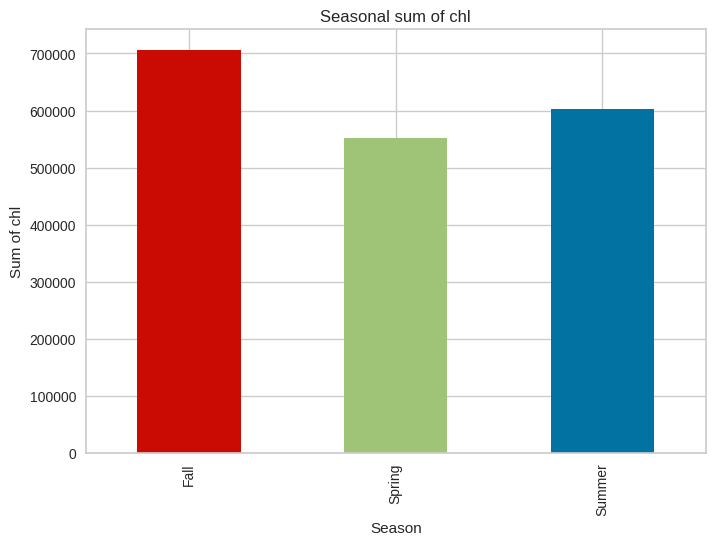

In [546]:
seasonal_sum.plot(kind='bar', color=['r', 'g', 'b', 'y'])

# 그래프 제목, x축 제목, y축 제목을 추가
plt.title('Seasonal sum of chl')
plt.xlabel('Season')
plt.ylabel('Sum of chl')

# 그래프를 화면에 출력
plt.show()

In [547]:
lake2 = lake2[lake2['Season'] != 'Spring']

In [548]:
# 위치
lake_map = {'Paldang': 1, 'Chungpyung': 2, 'Uiam': 3, 'Chunchon': 4, 'Soyang': 5, 'Hwachon': 6, 'Chungju': 7}
lake2['district'] = lake2['Lake'].replace(lake_map)

In [549]:
# 모델링
micro = lake2.copy()

micro = micro.drop(['No', 'Lake', 'Month', 'Season', 'Year',	'Elevation',	'rain',	'Input',	'Water_temp',	'cond',	'pH',	'SS',	'BOD',	'COD',	'T_N',	'DTN',	'NH4N',	'NO3N',	'T_P',	'DTP',	'PO4P',	'CHL'],axis=1)

In [550]:
df = lake2.copy()

In [551]:
# !pip install fastdtw

In [552]:
# Microcystis와의 DTW 유사도 계산
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Microcystis"]

from fastdtw import fastdtw
import numpy as np

# micro_c2를 정규화
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

# DTW를 이용한 유사도 계산
distances = []
drop_col_idx = micro.columns.get_loc("Microcystis") # Microcystis열의 인덱스
for i in range(micro_c1.shape[1]):
    if i != drop_col_idx: # Microcystis열을 제외한 열만 사용
        series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
        dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
        distances.append(dist)

# 유사도를 내림차순으로 정렬하여 출력
sorted_idx = np.argsort(distances)[::-1]
for i in sorted_idx:
    if i != drop_col_idx: # Microcystis열 제외한 열만 출력
        print(micro_c1.columns[i], ':', distances[i])

Peridinium : 277.7147586267574
Cryptomonas : 140.61280026624638
Pediastrum : 129.26572827433972
Nitzschia : 124.83004948539913
Navicula : 121.14200958659691
Dinobryon : 114.24690611381507
Hormidium : 113.81022410679084
Carteria : 112.47188594330447
Aulacoseira : 111.58401095275377
Fragilaria : 111.0635661263653
Eudorina : 110.72678345450514
Skeletonema : 110.3613110263046
Pandorina : 108.09502829356823
Mallomonas : 103.16594312266989
Chrococcus : 102.97790513533609
Achnanthes : 102.57726818342715
Cyclotella : 102.30703472695848
Asterococcus : 100.9877585247177
Micractinium : 100.76346170457892
Diatoma : 99.63226884081631
Scenedesmus : 95.33492830349415
Dolichospermum : 93.7428301877072
Chlamydomonas : 92.57675229198318
Stephanodiscus : 92.31666876261905
Characium : 89.21140900747515
Dictyosphaerium : 88.93291991934548
Melosira : 88.66499459143301
Gomphonema : 88.11761306571032
Lagynion : 88.0896960551976
Actinastrum : 87.7292165445838
Amphora : 87.1323434984414
Aphanothece : 87.1078144

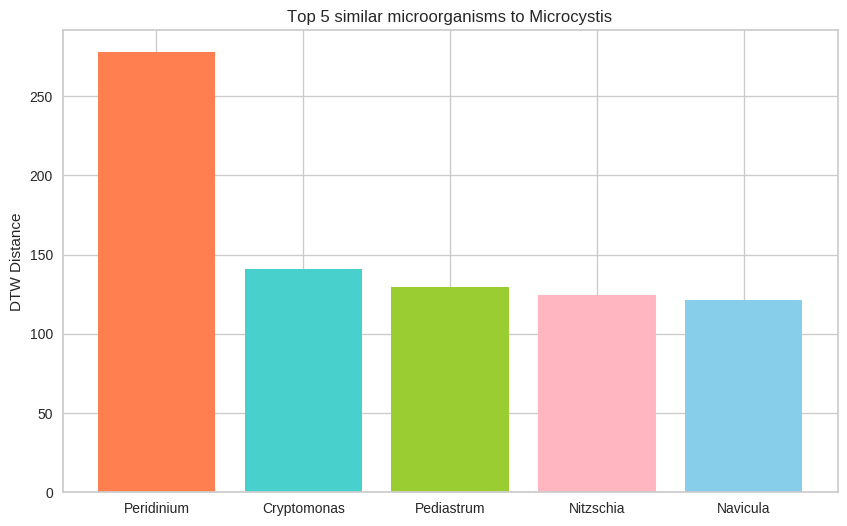

In [553]:
import matplotlib.pyplot as plt

# 유사도를 내림차순으로 정렬하여 출력
sorted_idx = np.argsort(distances)[::-1]
top_5 = []
labels = []
colors = ['coral', 'mediumturquoise', 'yellowgreen', 'lightpink', 'skyblue']
for i in sorted_idx[:5]:
    if i != drop_col_idx: # Microcystis열 제외한 열만 그래프로 출력
        top_5.append(distances[i])
        labels.append(micro_c1.columns[i])

# 막대그래프로 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, top_5, color=colors)
ax.set_title("Top 5 similar microorganisms to Microcystis")
ax.set_ylabel("DTW Distance")
plt.show()

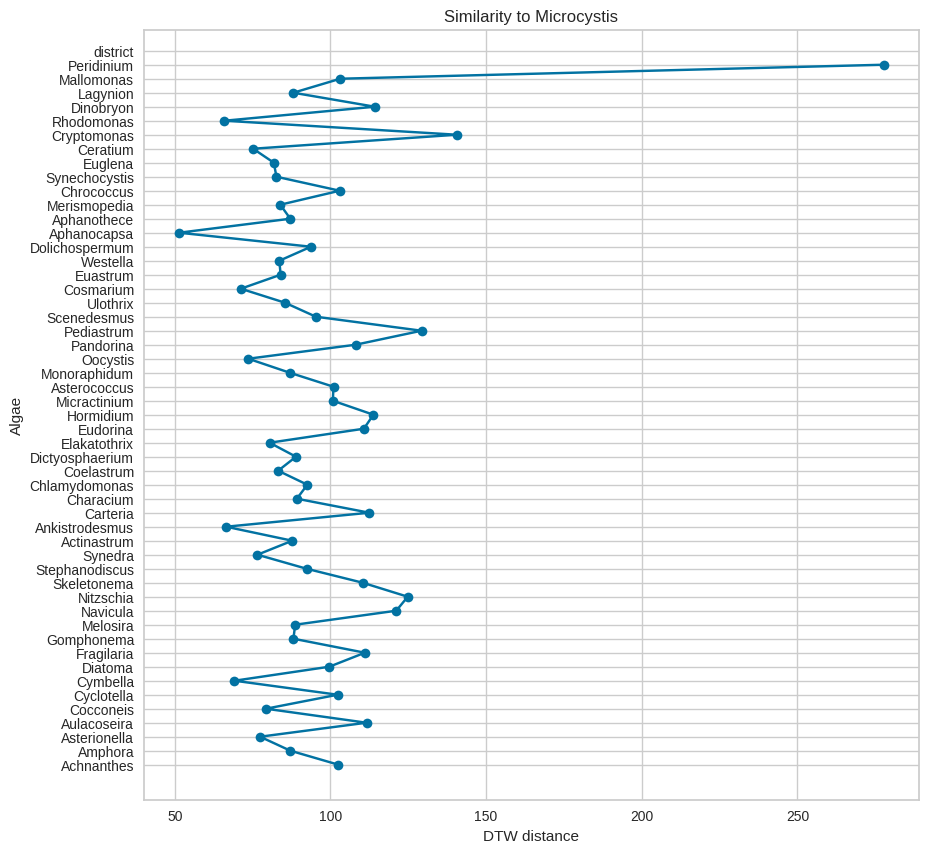

In [554]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(10, 10))
plt.plot(distances, range(len(distances)), 'o-')
plt.yticks(range(len(micro_c1.columns)), micro_c1.columns)
plt.xlabel('DTW distance')
plt.ylabel('Algae')
plt.title('Similarity to Microcystis')
plt.show()

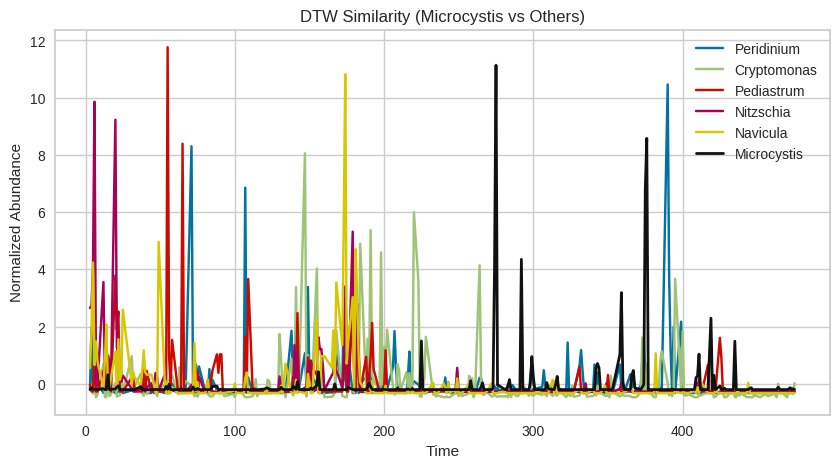

In [555]:
# 시각화
import matplotlib.pyplot as plt

# 유사도 상위 5개
top_5 = sorted_idx[:5]

plt.figure(figsize=(10,5))
for i in top_5:
    if i != drop_col_idx:
        series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
        plt.plot(series, label=micro_c1.columns[i])

plt.plot(micro_c2_norm, label='Microcystis', linewidth=2, color='k')
plt.legend(loc='best')
plt.title('DTW Similarity (Microcystis vs Others)')
plt.xlabel('Time')
plt.ylabel('Normalized Abundance')
plt.show()

Text(0.5, 0, 'DTW Distance')

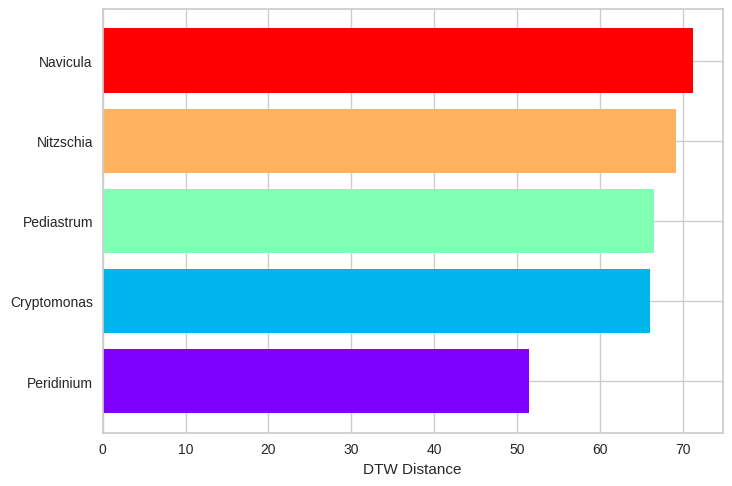

In [556]:
import matplotlib.cm as cm

# cmap으로 rainbow 설정
colors = cm.rainbow(np.linspace(0, 1, len(bottom5_cols)))

# 막대 그래프 출력
plt.barh(bottom5_cols, bottom5_distances, color=colors)
plt.xlabel('DTW Distance')

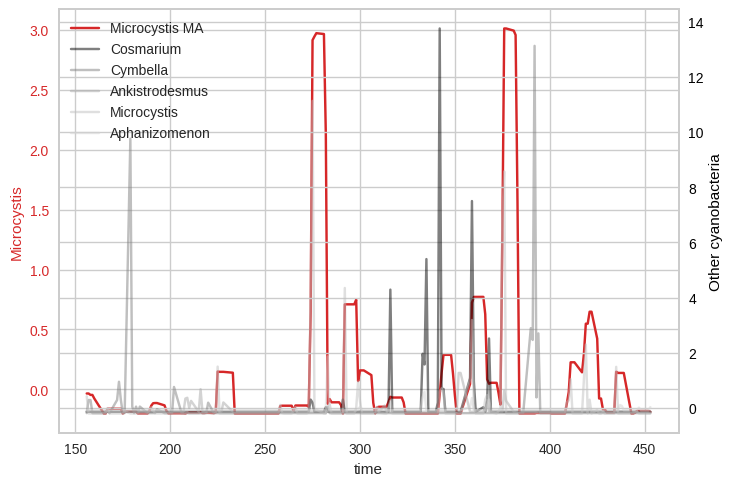

In [557]:
fig, ax1 = plt.subplots()
window_size = 5
micro_norm = (micro - micro.mean()) / micro.std()
ma_microcystis = micro_norm["Microcystis"].rolling(window_size).mean()

# Microcystis 변화 추이 그리기
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Microcystis', color=color)
ax1.plot(micro_norm.index[100:300], ma_microcystis[100:300], color=color, label="Microcystis MA")
ax1.tick_params(axis='y', labelcolor=color)

# 하위 5개 균주의 변화 추이 그리기
ax2 = ax1.twinx()
n_top = 5
colors = ['black', 'gray', 'darkgray', 'silver', 'lightgray']
for i, color in zip(sorted_idx[-n_top:], colors):
    ax2.plot(micro_norm.index[100:300], micro_norm.iloc[100:300, i], label=micro_norm.columns[i], color=color, alpha=0.5)
ax2.set_ylabel('Other cyanobacteria', color=colors[0])
ax2.tick_params(axis='y', labelcolor=colors[0])

# 범례 표시
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

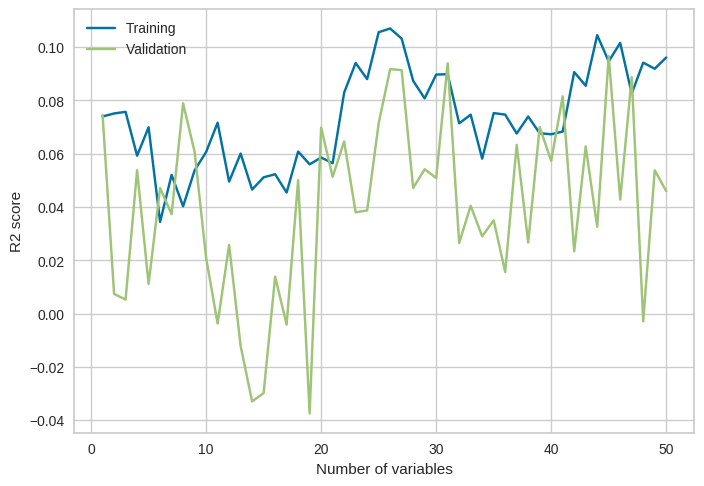

Best k: 45, Best R2 Score (Validation): 0.10, R2 Score (Training): 0.09


In [558]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from fastdtw import fastdtw

df = lake2.copy()
# micro 데이터프레임에서 Microcystis 열과 다른 열들 간의 DTW 유사도 계산
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Microcystis"]
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

distances = []
drop_col_idx = micro.columns.get_loc("Microcystis")
for i in range(micro_c1.shape[1]):
    if i != drop_col_idx:
        series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
        dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
        distances.append(dist)

# 유사도를 내림차순으로 정렬하여 XGBoost 모델에 사용할 변수 선택
r2_scores_train = []
r2_scores_val = []

for k in range(1, 51):
    top_k_vars = [micro_c1.columns[i] for i in np.argsort(distances)[::-1][:k]]
    X = df[top_k_vars + ['Elevation', 'rain', 'Input', 'Water_temp', 'cond', 'pH', 'SS', 'BOD', 'COD', 'T_N', 'DTN', 'NH4N', 'NO3N', 'T_P', 'DTP', 'PO4P', 'CHL', 'district']] 
    y = df['Microcystis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = XGBRegressor(
        learning_rate = 0.025,
        max_depth = 1,
        min_child_weight = 1,
        subsample = 0.1,
        colsample_bytree = 0.05,
        random_state = 42
    )
    model.fit(X_train, y_train)
    y_pred_1 = model.predict(X_train)
    y_pred_2 = model.predict(X_val)
    r2_score_train = model.score(X_train, y_train)
    r2_score_val = model.score(X_val, y_val)
    r2_scores_train.append(r2_score_train)
    r2_scores_val.append(r2_score_val)

plt.plot(range(1, 51), r2_scores_train, label='Training')
plt.plot(range(1, 51), r2_scores_val, label='Validation')
plt.xlabel('Number of variables')
plt.ylabel('R2 score')
plt.legend()
plt.show()
best_k = np.argmax(r2_scores_val) + 1
print("Best k: {}, Best R2 Score (Validation): {:.2f}, R2 Score (Training): {:.2f}".format(best_k, r2_scores_val[best_k-1], r2_scores_train[best_k-1]))

In [559]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter_rf = PermutationImportance(
    model,  # model
    scoring="neg_mean_absolute_error",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter_rf.fit(X_test, y_test)

PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.05,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.025, max_bin=256,
                                             max_cat_threshold=64,
                                             max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=1,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=0,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=42, ...),
                      n_iter=10, random_state=42,
                      scoring='neg_mean_absolute_error')

Text(0.5, 1.0, 'Permutation Importance (Top 10)')

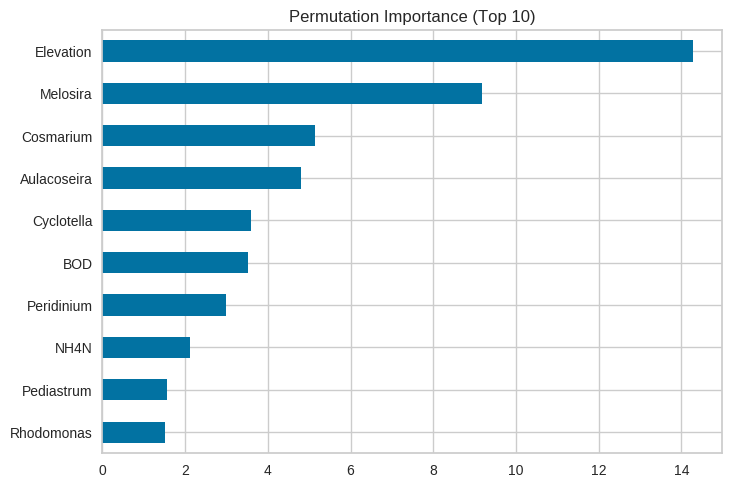

In [560]:
feature_names = X_test.columns.values.tolist()
pi = pd.Series(permuter_rf.feature_importances_, feature_names).sort_values()
pi_top10 = pi[-10:]
pi_top10.plot.barh()
plt.title("Permutation Importance (Top 10)")

In [561]:
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Pseudanabaena"]

from fastdtw import fastdtw
import numpy as np

# micro_c2를 정규화
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

# DTW를 이용한 유사도 계산
distances = []
for i in range(micro_c1.shape[1]):
    series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
    dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
    distances.append(dist)

# 유사도를 내림차순으로 정렬하여 출력
sorted_idx = np.argsort(distances)[::-1]
for i in sorted_idx:
    print(micro_c1.columns[i], ':', distances[i])

district : 291.7644856134065
Rhodomonas : 180.85669523150548
Cryptomonas : 155.08329764800052
Melosira : 135.6582400364433
Peridinium : 135.44044268375504
Fragilaria : 135.37188497419862
Pediastrum : 127.67879645869466
Aulacoseira : 120.42874825578208
Navicula : 119.43620599704036
Chlamydomonas : 118.32439246155528
Ceratium : 116.82104069947582
Stephanodiscus : 114.44135770337499
Nitzschia : 112.69327835364665
Asterococcus : 110.9799289665544
Eudorina : 110.92305495789338
Dictyosphaerium : 108.76610140729247
Scenedesmus : 108.69295755666299
Dolichospermum : 104.96591222885397
Cyclotella : 103.24002440975367
Synedra : 101.88485728178094
Mallomonas : 97.73234267184615
Diatoma : 94.35409105833766
Pandorina : 91.99923480864737
Achnanthes : 90.73131528943041
Oocystis : 90.37414389123093
Micractinium : 85.62458631070217
Coelastrum : 83.39929358979381
Dinobryon : 82.12055075039166
Amphora : 78.73292347264723
Lagynion : 77.56990011799374
Gomphonema : 72.54553419766519
Elakatothrix : 72.1768623

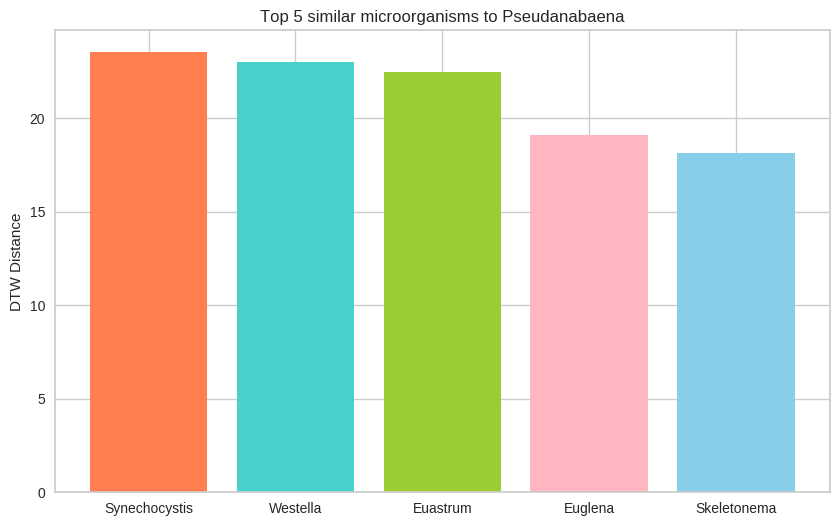

In [562]:
import matplotlib.pyplot as plt

# 유사도를 내림차순으로 정렬하여 출력
sorted_idx = np.argsort(distances)[::-1]
top_5 = []
labels = []
colors = ['coral', 'mediumturquoise', 'yellowgreen', 'lightpink', 'skyblue']
for i in sorted_idx[-5:]:
    top_5.append(distances[i])
    labels.append(micro_c1.columns[i])

# 막대그래프로 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, top_5, color=colors)
ax.set_title("Top 5 similar microorganisms to Pseudanabaena")
ax.set_ylabel("DTW Distance")
plt.show()

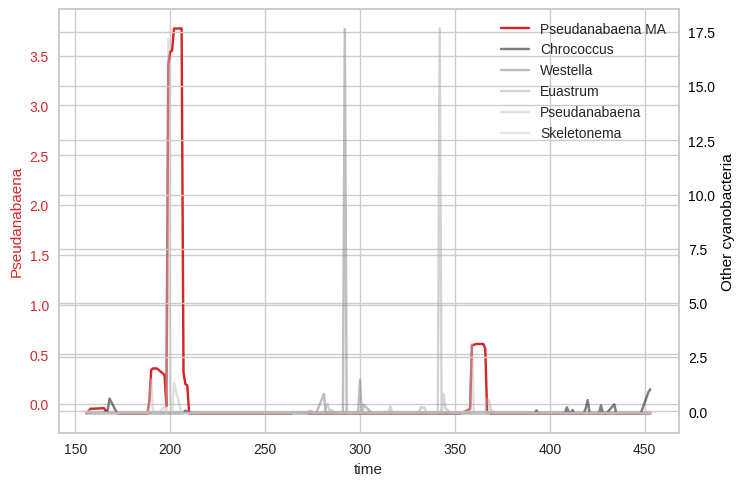

In [563]:
fig, ax1 = plt.subplots()
window_size = 5
micro_norm = (micro - micro.mean()) / micro.std()
ma_microcystis = micro_norm["Pseudanabaena"].rolling(window_size).mean()

# Microcystis 변화 추이 그리기
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Pseudanabaena', color=color)
ax1.plot(micro_norm.index[100:300], ma_microcystis[100:300], color=color, label="Pseudanabaena MA")
ax1.tick_params(axis='y', labelcolor=color)

# 하위 5개 균주의 변화 추이 그리기
ax2 = ax1.twinx()
n_top = 5
colors = ['black', 'gray', 'darkgray', 'silver', 'lightgray']
for i, color in zip(sorted_idx[-n_top:], colors):
    ax2.plot(micro_norm.index[100:300], micro_norm.iloc[100:300, i], label=micro_norm.columns[i], color=color, alpha=0.5)
ax2.set_ylabel('Other cyanobacteria', color=colors[0])
ax2.tick_params(axis='y', labelcolor=colors[0])

# 범례 표시
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

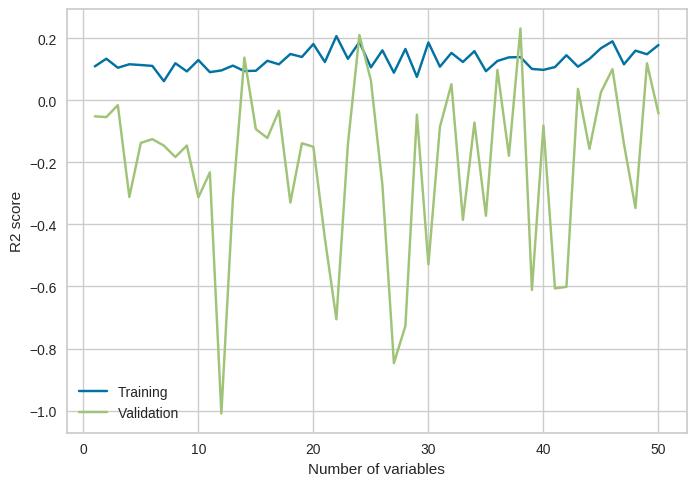

Best k: 38, Best R2 Score (Validation): 0.23, R2 Score (Training): 0.14


In [564]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from fastdtw import fastdtw

df = lake2.copy()
# micro 데이터프레임에서 Microcystis 열과 다른 열들 간의 DTW 유사도 계산
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Pseudanabaena"]
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

distances = []
drop_col_idx = micro.columns.get_loc("Pseudanabaena")
for i in range(micro_c1.shape[1]):
    if i != drop_col_idx:
        series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
        dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
        distances.append(dist)

# 유사도를 내림차순으로 정렬하여 XGBoost 모델에 사용할 변수 선택
r2_scores_train = []
r2_scores_val = []

for k in range(1, 51):
    top_k_vars = [micro_c1.columns[i] for i in np.argsort(distances)[::-1][:k]]
    X = df[top_k_vars + ['Elevation', 'rain', 'Input', 'Water_temp', 'cond', 'pH', 'SS', 'BOD', 'COD', 'T_N', 'DTN', 'NH4N', 'NO3N', 'T_P', 'DTP', 'PO4P', 'CHL', 'district']] 
    y = df['Pseudanabaena']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = XGBRegressor(
        learning_rate = 0.045,
        max_depth = 1,
        min_child_weight = 1,
        subsample = 0.1,
        colsample_bytree = 0.1,
        random_state = 42
    )
    model.fit(X_train, y_train)
    y_pred_1 = model.predict(X_train)
    y_pred_2 = model.predict(X_val)
    r2_score_train = model.score(X_train, y_train)
    r2_score_val = model.score(X_val, y_val)
    r2_scores_train.append(r2_score_train)
    r2_scores_val.append(r2_score_val)

plt.plot(range(1, 51), r2_scores_train, label='Training')
plt.plot(range(1, 51), r2_scores_val, label='Validation')
plt.xlabel('Number of variables')
plt.ylabel('R2 score')
plt.legend()
plt.show()
best_k = np.argmax(r2_scores_val) + 1
print("Best k: {}, Best R2 Score (Validation): {:.2f}, R2 Score (Training): {:.2f}".format(best_k, r2_scores_val[best_k-1], r2_scores_train[best_k-1]))

In [565]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter_rf = PermutationImportance(
    model,  # model
    scoring="neg_mean_absolute_error",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter_rf.fit(X_test, y_test)

PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.1,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.045, max_bin=256,
                                             max_cat_threshold=64,
                                             max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=1,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=0,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=42, ...),
                      n_iter=10, random_state=42,
                      scoring='neg_mean_absolute_error')

Text(0.5, 1.0, 'Permutation Importance (Top 10)')

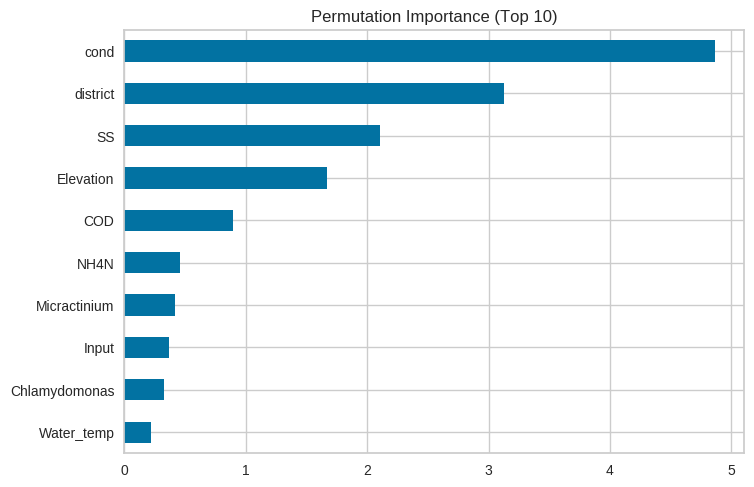

In [566]:
feature_names = X_test.columns.values.tolist()
pi = pd.Series(permuter_rf.feature_importances_, feature_names).sort_values()
pi_top10 = pi[-10:]
pi_top10.plot.barh()
plt.title("Permutation Importance (Top 10)")

In [567]:
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Oscillatoriale"]

from fastdtw import fastdtw
import numpy as np

# micro_c2를 정규화
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

# DTW를 이용한 유사도 계산
distances = []
for i in range(micro_c1.shape[1]):
    series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
    dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
    distances.append(dist)

# 유사도를 내림차순으로 정렬하여 출력
sorted_idx = np.argsort(distances)[::-1]
for i in sorted_idx:
    print(micro_c1.columns[i], ':', distances[i])

district : 317.18420830707737
Rhodomonas : 169.6571996113745
Cryptomonas : 141.51966234442574
Navicula : 136.22793934746716
Aulacoseira : 131.28787313391516
Asterococcus : 126.71144818000582
Nitzschia : 123.36509953713743
Cyclotella : 121.82593475570182
Eudorina : 114.19319817847276
Peridinium : 113.97846150507847
Fragilaria : 110.14158979044761
Lagynion : 107.54815793621603
Carteria : 105.90086694462002
Stephanodiscus : 102.02986593215452
Chrococcus : 100.5787218768371
Chlamydomonas : 100.26920335124952
Dolichospermum : 100.20867417787956
Pediastrum : 98.70958230245688
Elakatothrix : 97.96895030534347
Scenedesmus : 96.69357701738123
Melosira : 96.26039587104658
Diatoma : 94.85321744584559
Aphanothece : 92.91634059994378
Pandorina : 92.39191934402486
Mallomonas : 90.3911858946827
Amphora : 90.31459777141885
Oocystis : 88.4778415579702
Euastrum : 87.84508544486395
Gomphonema : 87.4736044321703
Micractinium : 84.94505394936884
Dictyosphaerium : 83.09718842793073
Westella : 82.08811986478

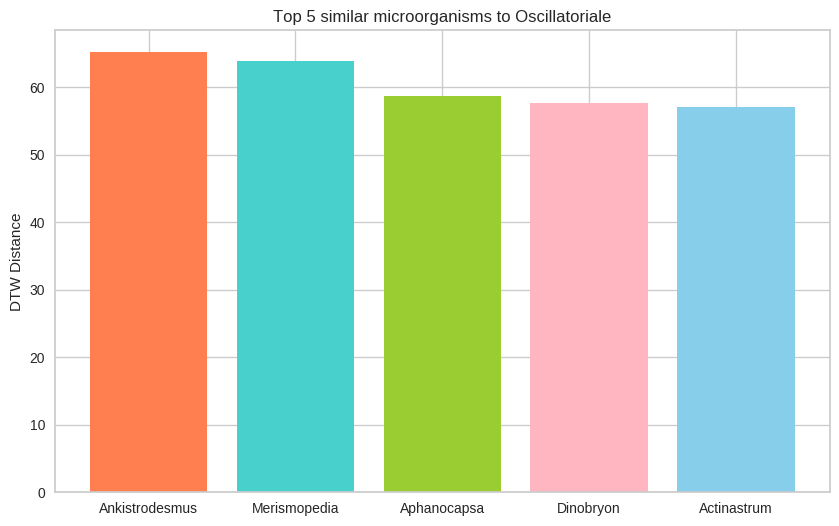

In [568]:
import matplotlib.pyplot as plt

# 유사도를 내림차순으로 정렬하여 출력
sorted_idx = np.argsort(distances)[::-1]
top_5 = []
labels = []
colors = ['coral', 'mediumturquoise', 'yellowgreen', 'lightpink', 'skyblue']
for i in sorted_idx[-5:]:
    top_5.append(distances[i])
    labels.append(micro_c1.columns[i])

# 막대그래프로 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, top_5, color=colors)
ax.set_title("Top 5 similar microorganisms to Oscillatoriale")
ax.set_ylabel("DTW Distance")
plt.show()

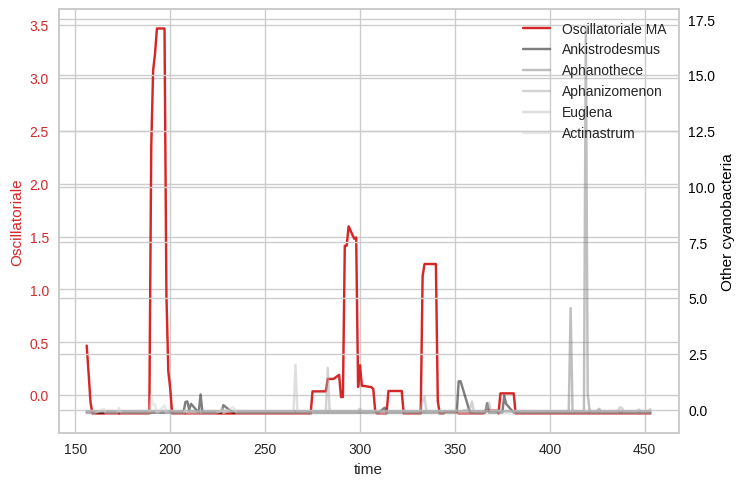

In [569]:
fig, ax1 = plt.subplots()
window_size = 5
micro_norm = (micro - micro.mean()) / micro.std()
ma_microcystis = micro_norm["Oscillatoriale"].rolling(window_size).mean()

# Microcystis 변화 추이 그리기
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Oscillatoriale', color=color)
ax1.plot(micro_norm.index[100:300], ma_microcystis[100:300], color=color, label="Oscillatoriale MA")
ax1.tick_params(axis='y', labelcolor=color)

# 하위 5개 균주의 변화 추이 그리기
ax2 = ax1.twinx()
n_top = 5
colors = ['black', 'gray', 'darkgray', 'silver', 'lightgray']
for i, color in zip(sorted_idx[-n_top:], colors):
    ax2.plot(micro_norm.index[100:300], micro_norm.iloc[100:300, i], label=micro_norm.columns[i], color=color, alpha=0.5)
ax2.set_ylabel('Other cyanobacteria', color=colors[0])
ax2.tick_params(axis='y', labelcolor=colors[0])

# 범례 표시
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

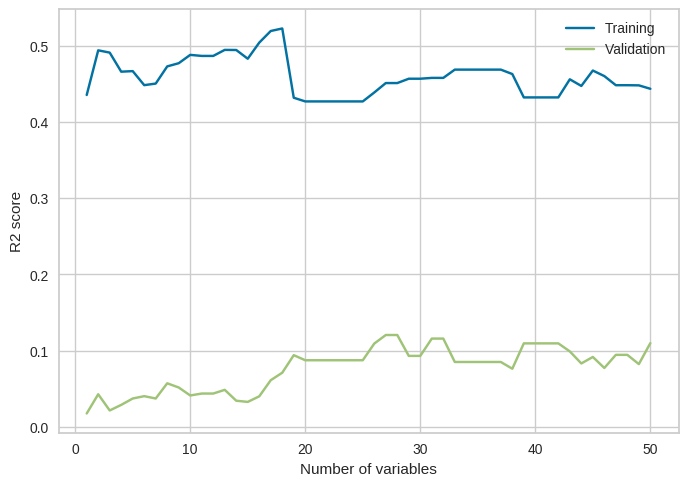

Best k: 27, Best R2 Score (Validation): 0.12, R2 Score (Training): 0.45


In [570]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from fastdtw import fastdtw

df = lake2.copy()
# micro 데이터프레임에서 Microcystis 열과 다른 열들 간의 DTW 유사도 계산
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Oscillatoriale"]
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

distances = []
drop_col_idx = micro.columns.get_loc("Oscillatoriale")
for i in range(micro_c1.shape[1]):
    if i != drop_col_idx:
        series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
        dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
        distances.append(dist)

# 유사도를 내림차순으로 정렬하여 XGBoost 모델에 사용할 변수 선택
r2_scores_train = []
r2_scores_val = []

for k in range(1, 51):
    top_k_vars = [micro_c1.columns[i] for i in np.argsort(distances)[::-1][:k]]
    X = df[top_k_vars + ['Elevation', 'rain', 'Input', 'Water_temp', 'cond', 'pH', 'SS', 'BOD', 'COD', 'T_N', 'DTN', 'NH4N', 'NO3N', 'T_P', 'DTP', 'PO4P', 'CHL']] 
    y = df['Oscillatoriale']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = XGBRegressor(
        learning_rate = 0.1,
        max_depth = 3,
        min_child_weight = 1,
        subsample = 0.1,
        colsample_bytree = 1,
        random_state = 42
    )
    model.fit(X_train, y_train)
    y_pred_1 = model.predict(X_train)
    y_pred_2 = model.predict(X_val)
    r2_score_train = model.score(X_train, y_train)
    r2_score_val = model.score(X_val, y_val)
    r2_scores_train.append(r2_score_train)
    r2_scores_val.append(r2_score_val)

plt.plot(range(1, 51), r2_scores_train, label='Training')
plt.plot(range(1, 51), r2_scores_val, label='Validation')
plt.xlabel('Number of variables')
plt.ylabel('R2 score')
plt.legend()
plt.show()
best_k = np.argmax(r2_scores_val) + 1
print("Best k: {}, Best R2 Score (Validation): {:.2f}, R2 Score (Training): {:.2f}".format(best_k, r2_scores_val[best_k-1], r2_scores_train[best_k-1]))

In [571]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter_rf = PermutationImportance(
    model,  # model
    scoring="neg_mean_absolute_error",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter_rf.fit(X_test, y_test)

PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.1, max_bin=256,
                                             max_cat_threshold=64,
                                             max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=3,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=0,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=42, ...),
                      n_iter=10, random_state=42,
                      scoring='neg_mean_absolute_error')

Text(0.5, 1.0, 'Permutation Importance (Top 10)')

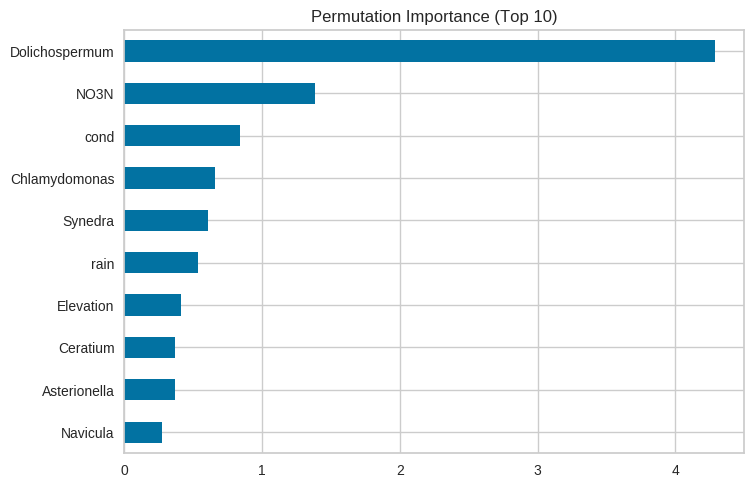

In [572]:
feature_names = X_test.columns.values.tolist()
pi = pd.Series(permuter_rf.feature_importances_, feature_names).sort_values()
pi_top10 = pi[-10:]
pi_top10.plot.barh()
plt.title("Permutation Importance (Top 10)")

In [573]:
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Aphanizomenon"]

from fastdtw import fastdtw
import numpy as np

# micro_c2를 정규화
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

# DTW를 이용한 유사도 계산
distances = []
for i in range(micro_c1.shape[1]):
    series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
    dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
    distances.append(dist)

# 유사도를 내림차순으로 정렬하여 출력
sorted_idx = np.argsort(distances)[::-1]
for i in sorted_idx:
    print(micro_c1.columns[i], ':', distances[i])

district : 288.40375806130845
Rhodomonas : 181.59737171950908
Cryptomonas : 164.2796141171229
Fragilaria : 149.8251436230894
Asterococcus : 140.0718255371177
Aulacoseira : 139.96892058872277
Navicula : 139.5508462806306
Nitzschia : 133.21644129251922
Peridinium : 127.0655561622487
Stephanodiscus : 126.47293959252531
Dictyosphaerium : 124.64014481230379
Ceratium : 123.32916238691482
Pediastrum : 122.2721674200285
Chlamydomonas : 119.84849890130428
Eudorina : 116.93084714518463
Scenedesmus : 114.52081361897967
Dolichospermum : 112.37834576769693
Mallomonas : 110.61492947124324
Melosira : 108.81856275473406
Synedra : 108.10725954859544
Diatoma : 101.05810105475092
Cyclotella : 94.36340173442318
Oocystis : 91.85112405721424
Cymbella : 89.53169706169842
Dinobryon : 89.36181581386299
Amphora : 88.58119213151963
Pandorina : 88.10557103706776
Coelastrum : 85.68431370352046
Achnanthes : 84.31903250828815
Cosmarium : 79.7408401724297
Gomphonema : 78.84820424187149
Micractinium : 77.0646603975203

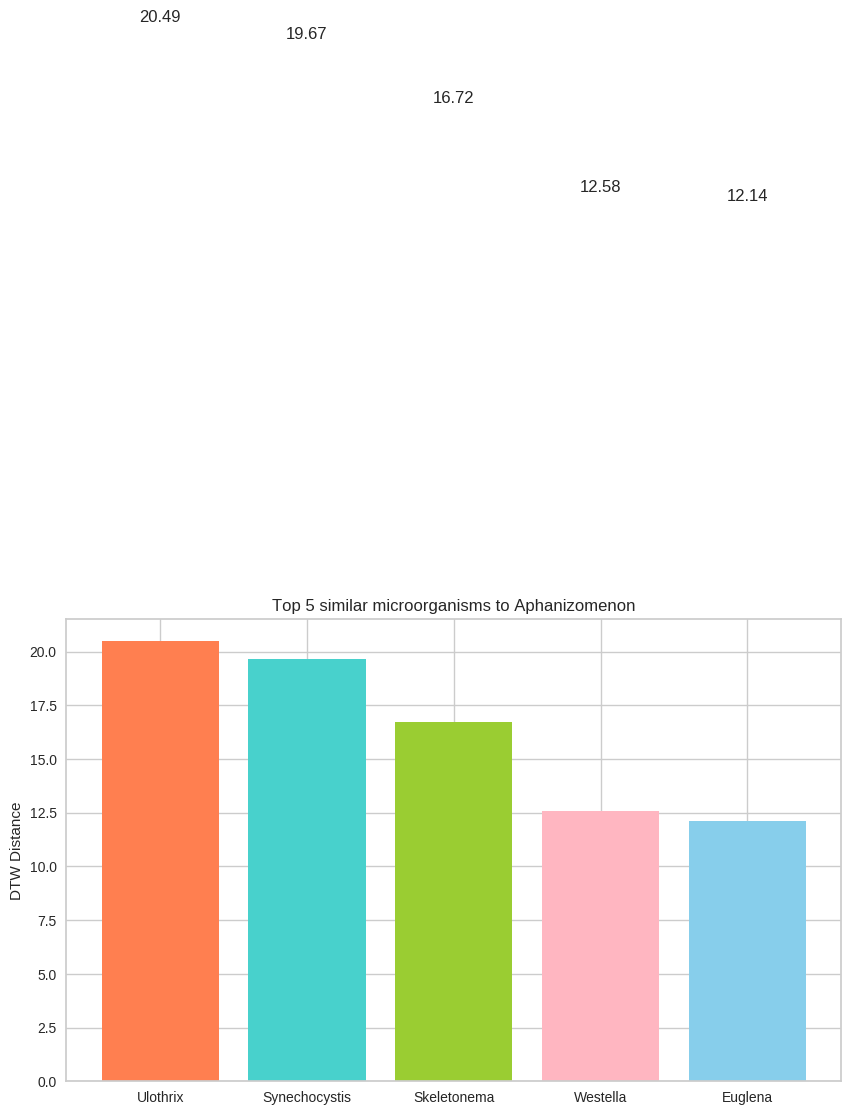

In [574]:
import matplotlib.pyplot as plt
import numpy as np

# Sort distances in descending order
sorted_idx = np.argsort(distances)[::-1]
top_5 = []
labels = []
colors = ['coral', 'mediumturquoise', 'yellowgreen', 'lightpink', 'skyblue']

# Get top 5 distances and corresponding labels
for i in sorted_idx[-5:]:
    top_5.append(distances[i])
    labels.append(micro_c1.columns[i])

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, top_5, color=colors)
ax.set_title("Top 5 similar microorganisms to Aphanizomenon")
ax.set_ylabel("DTW Distance")

# Add labels for each bar
for i, v in enumerate(top_5):
    ax.text(i, v + 0.1*np.max(distances), f"{v:.2f}", ha='center', fontsize=12)

plt.show()

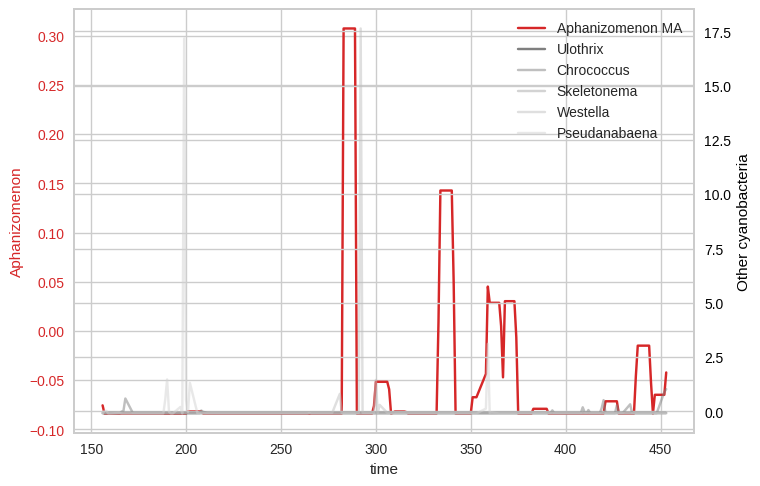

In [575]:
fig, ax1 = plt.subplots()
window_size = 5
micro_norm = (micro - micro.mean()) / micro.std()
ma_microcystis = micro_norm["Aphanizomenon"].rolling(window_size).mean()

# Microcystis 변화 추이 그리기
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Aphanizomenon', color=color)
ax1.plot(micro_norm.index[100:300], ma_microcystis[100:300], color=color, label="Aphanizomenon MA")
ax1.tick_params(axis='y', labelcolor=color)

# 하위 5개 균주의 변화 추이 그리기
ax2 = ax1.twinx()
n_top = 5
colors = ['black', 'gray', 'darkgray', 'silver', 'lightgray']
for i, color in zip(sorted_idx[-n_top:], colors):
    ax2.plot(micro_norm.index[100:300], micro_norm.iloc[100:300, i], label=micro_norm.columns[i], color=color, alpha=0.5)
ax2.set_ylabel('Other cyanobacteria', color=colors[0])
ax2.tick_params(axis='y', labelcolor=colors[0])

# 범례 표시
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

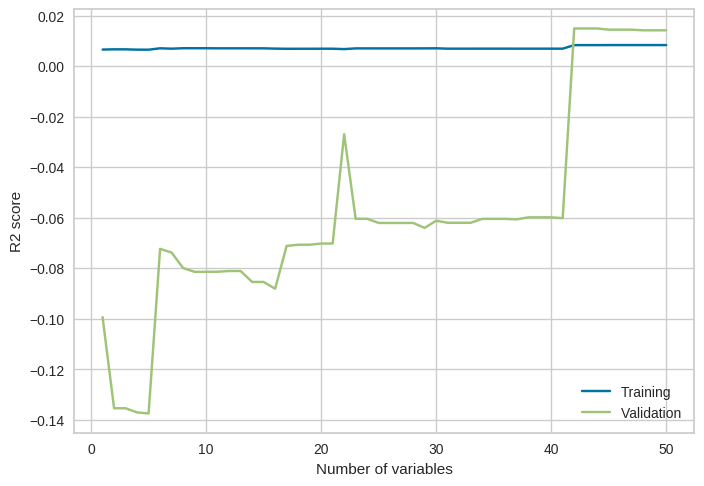

Best k: 42, Best R2 Score (Validation): 0.01, R2 Score (Training): 0.01


In [576]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from fastdtw import fastdtw

df = lake2.copy()
# micro 데이터프레임에서 Microcystis 열과 다른 열들 간의 DTW 유사도 계산
micro_c1 = micro.drop(["Microcystis", "Pseudanabaena", "Oscillatoriale", "Aphanizomenon"], axis=1)
micro_c2 = micro["Aphanizomenon"]
micro_c2_norm = (micro_c2 - micro_c2.mean()) / micro_c2.std()

distances = []
drop_col_idx = micro.columns.get_loc("Aphanizomenon")
for i in range(micro_c1.shape[1]):
    if i != drop_col_idx:
        series = (micro_c1.iloc[:, i] - micro_c1.iloc[:, i].mean()) / micro_c1.iloc[:, i].std()
        dist, _ = fastdtw(micro_c2_norm, series, dist=lambda x, y: np.linalg.norm(x - y))
        distances.append(dist)

# 유사도를 내림차순으로 정렬하여 XGBoost 모델에 사용할 변수 선택
r2_scores_train = []
r2_scores_val = []

for k in range(1, 51):
    top_k_vars = [micro_c1.columns[i] for i in np.argsort(distances)[::-1][:k]]
    X = df[top_k_vars + ['Elevation', 'rain', 'Input', 'Water_temp', 'cond', 'pH', 'SS', 'BOD', 'COD', 'T_N', 'DTN', 'NH4N', 'NO3N', 'T_P', 'DTP', 'PO4P', 'CHL', 'district']] 
    y = df['Aphanizomenon']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = XGBRegressor(
        learning_rate = 0.003,
        max_depth = 1,
        min_child_weight = 1,
        subsample = 0.1,
        colsample_bytree = 1,
        random_state = 42
    )
    model.fit(X_train, y_train)
    y_pred_1 = model.predict(X_train)
    y_pred_2 = model.predict(X_val)
    r2_score_train = model.score(X_train, y_train)
    r2_score_val = model.score(X_val, y_val)
    r2_scores_train.append(r2_score_train)
    r2_scores_val.append(r2_score_val)

plt.plot(range(1, 51), r2_scores_train, label='Training')
plt.plot(range(1, 51), r2_scores_val, label='Validation')
plt.xlabel('Number of variables')
plt.ylabel('R2 score')
plt.legend()
plt.show()
best_k = np.argmax(r2_scores_val) + 1
print("Best k: {}, Best R2 Score (Validation): {:.2f}, R2 Score (Training): {:.2f}".format(best_k, r2_scores_val[best_k-1], r2_scores_train[best_k-1]))

In [577]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter_rf = PermutationImportance(
    model,  # model
    scoring="neg_mean_absolute_error",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter_rf.fit(X_test, y_test)

PermutationImportance(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.003, max_bin=256,
                                             max_cat_threshold=64,
                                             max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=1,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=0,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=42, ...),
                      n_iter=10, random_state=42,
                      scoring='neg_mean_absolute_error')

Text(0.5, 1.0, 'Permutation Importance (Top 10)')

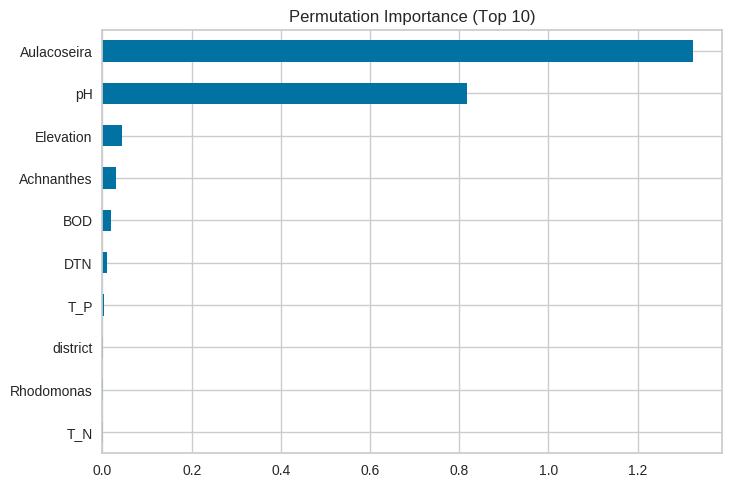

In [578]:
feature_names = X_test.columns.values.tolist()
pi = pd.Series(permuter_rf.feature_importances_, feature_names).sort_values()
pi_top10 = pi[-10:]
pi_top10.plot.barh()
plt.title("Permutation Importance (Top 10)")

In [579]:
df = lake2.copy()

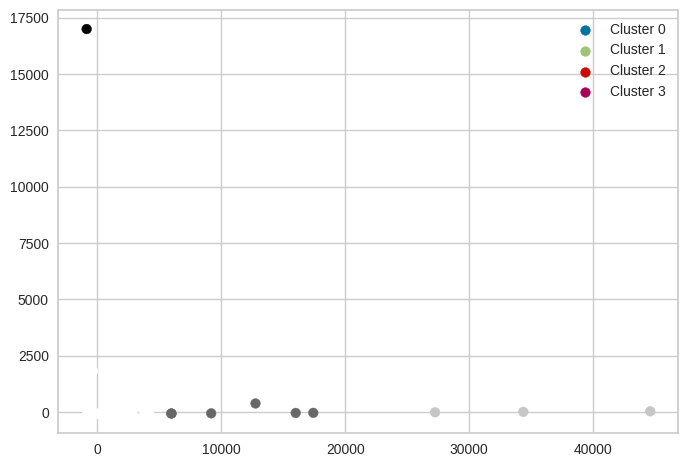

In [580]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df[['Microcystis', 'Pseudanabaena', 'Oscillatoriale', 'Aphanizomenon']].dropna()

# PCA를 사용하여 4차원 데이터를 2차원으로 축소합니다.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# KMeans를 사용하여 클러스터링을 수행합니다.
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# 클러스터링 결과를 시각화합니다.
labels = kmeans.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

# Add legend with cluster labels
unique_labels = list(set(labels))
for label in unique_labels:
    plt.scatter([], [], c='C{}'.format(label), label='Cluster {}'.format(label))
plt.legend()

plt.show()

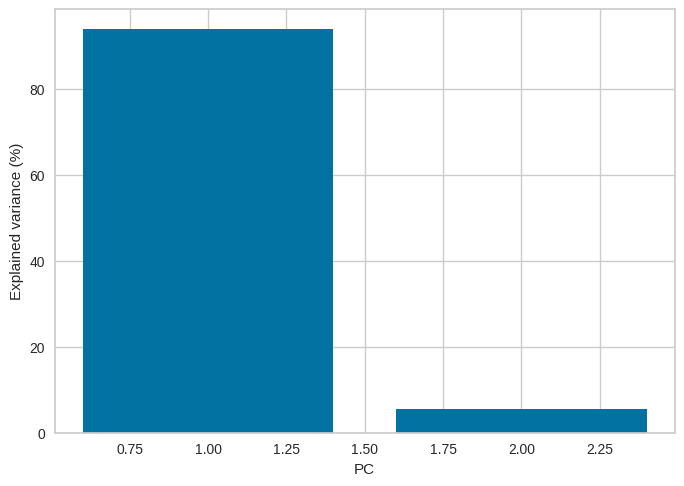

In [581]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df[['Microcystis', 'Pseudanabaena', 'Oscillatoriale', 'Aphanizomenon']].dropna()

# PCA를 사용하여 4차원 데이터를 2차원으로 축소합니다.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 각 PC가 전체 분산 중에서 차지하는 비율을 계산합니다.
explained_variances = pca.explained_variance_ratio_ * 100

# 결과를 시각화합니다.
plt.bar(range(1, len(explained_variances) + 1), explained_variances)
plt.xlabel('PC')
plt.ylabel('Explained variance (%)')
plt.show()

In [582]:
df['cluster'] = kmeans.labels_

In [583]:
df_c = df[['cluster', 'Microcystis', 'Pseudanabaena', 'Oscillatoriale', 'Aphanizomenon']]

In [584]:
df_c = df[['cluster', 'Microcystis', 'Pseudanabaena', 'Oscillatoriale', 'Aphanizomenon']]
cluster_stats = df_c.groupby('cluster').describe()
pd.options.display.max_columns = None
pd.options.display.max_rows = None
cluster_stats.T

cluster                         0             1             2        3
Microcystis    count   306.000000      3.000000      6.000000      1.0
               mean    237.895425  36216.333333  12034.166667      0.0
               std     736.601475   8723.738323   4955.584987      NaN
               min       0.000000  28060.000000   6773.000000      0.0
               25%       0.000000  31617.500000   7606.750000      0.0
               50%       0.000000  35175.000000  11786.500000      0.0
               75%      51.000000  40294.500000  16006.000000      0.0
               max    5000.000000  45414.000000  18233.000000      0.0
Pseudanabaena  count   306.000000      3.000000      6.000000      1.0
               mean     29.088235      0.000000    177.833333      0.0
               std     333.092871      0.000000    435.600926      NaN
               min       0.000000      0.000000      0.000000      0.0
               25%       0.000000      0.000000      0.000000      0.0
               50%       0.000000      0.000000      0.000000      0.0
               75%       0.000000      0.000000      0.000000      0.0
               max    5750.000000      0.000000   1067.000000      0.0
Oscillatoriale count   306.000000      3.000000      6.000000      1.0
               mean     17.627451     40.333333    138.000000      0.0
               std     107.855877     69.859383    338.029585      NaN
               min       0.000000      0.000000      0.000000      0.0
               25%       0.000000      0.000000      0.000000      0.0
               50%       0.000000      0.000000      0.000000      0.0
               75%       0.000000     60.500000      0.000000      0.0
               max    1458.000000    121.000000    828.000000      0.0
Aphanizomenon  count   306.000000      3.000000      6.000000      1.0
               mean     26.702614      0.000000     71.666667  17080.0
               std     139.908189      0.000000    175.546765      NaN
               min       0.000000      0.000000      0.000000  17080.0
               25%       0.000000      0.000000      0.000000  17080.0
               50%       0.000000      0.000000      0.000000  17080.0
               75%       0.000000      0.000000      0.000000  17080.0
               max    1896.000000      0.000000    430.000000  17080.0

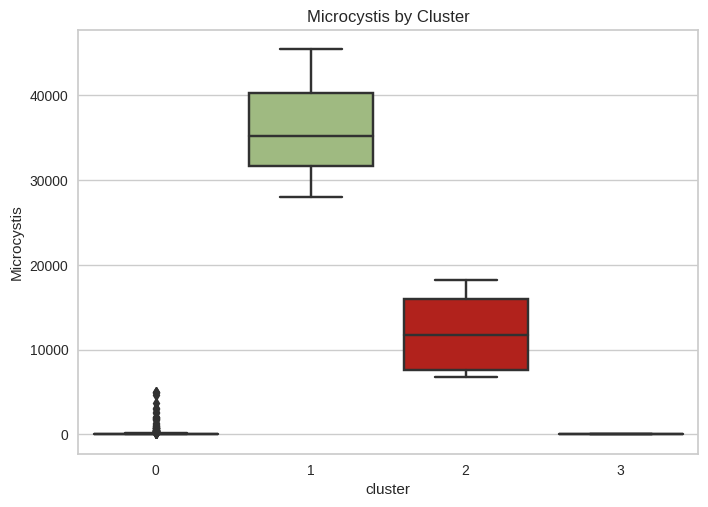

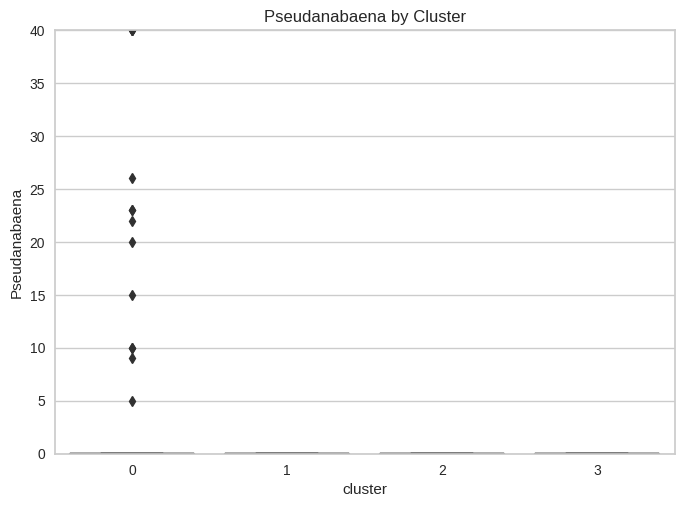

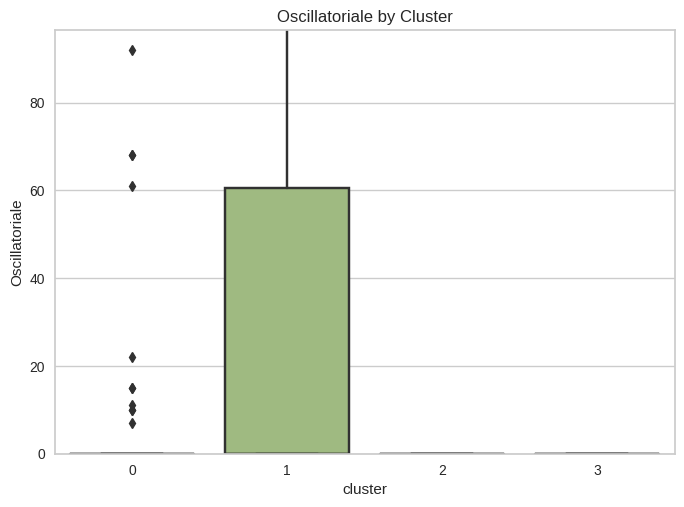

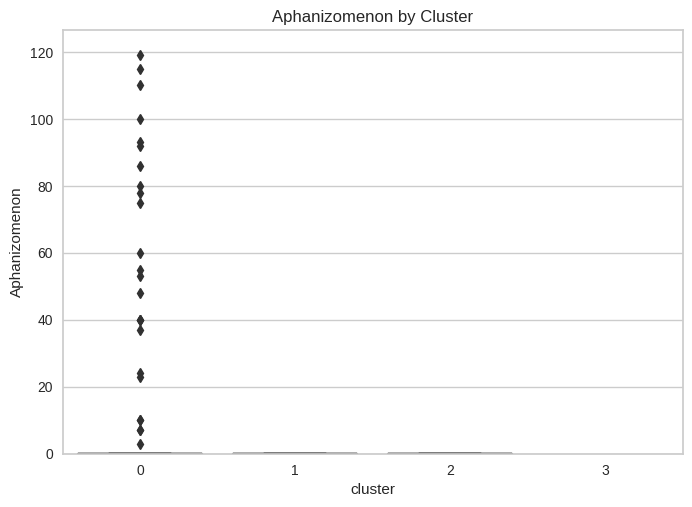

In [592]:
import seaborn as sns

sns.boxplot(x='cluster', y='Microcystis', data=df_c)
plt.title('Microcystis by Cluster')
plt.show()

sns.boxplot(x='cluster', y='Pseudanabaena', data=df_c)
plt.ylim(0, df_c['Pseudanabaena'].quantile(0.95))
plt.title('Pseudanabaena by Cluster')
plt.show()

sns.boxplot(x='cluster', y='Oscillatoriale', data=df_c)
plt.ylim(0, df_c['Oscillatoriale'].quantile(0.95))
plt.title('Oscillatoriale by Cluster')
plt.show()

sns.boxplot(x='cluster', y='Aphanizomenon', data=df_c)
plt.ylim(0, df_c['Aphanizomenon'].quantile(0.95))
plt.title('Aphanizomenon by Cluster')
plt.show()

In [586]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

target = "cluster"
X = df.drop([target, 'Microcystis', 'Pseudanabaena', 'Oscillatoriale', 'Aphanizomenon'], axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(
    OneHotEncoder(),
    LogisticRegression(random_state=42, multi_class='ovr')
)

pipe_lr.fit(X_train, y_train)

from sklearn.metrics import classification_report

pred1 = pipe_lr.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.94        64
   macro avg       0.33      0.32      0.33        64
weighted avg       0.95      0.94      0.95        64



In [587]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [588]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(pipe_lr, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

ImportError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = [[58, 0, 3], [2, 0, 0], [1, 0, 0]]
labels = ['0', '1', '2']

ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


preds = pipe_lr.predict(X_test)
cm = confusion_matrix(y_test, preds)

plot_confusion_matrix(pipe_lr, X_test, y_test, cmap=plt.cm.Reds)
plt.title('Confusion Matrix - Test Data', fontsize=15)
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# permutation importance 계산
result = permutation_importance(pipe_lr, X_val, y_val, n_repeats=10, random_state=42)

# 중요도 값 출력
importance = result.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix 계산
cm = confusion_matrix(y_test, pipe_lr.predict(X_test))

# heatmap 그리기
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"fontsize":15}, fmt='g', cmap='Blues', 
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (n = {})'.format(len(y_test)), fontsize=15)

plt.subplots_adjust(top=0.8)
plt.show()